# Banknote Authentication

## About

#### Problem
Distinguishing genuine and **forged banknotes**.

#### Data source
[UCI Machine Learning Repository](https://archive.ics.uci.edu/)

In [1]:
# for data manipulation & visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Banknote Authentication dataset

In [2]:
# load data

filepath = r"D:\ML\Machine Learning_Practical\Scikit Learn\Decision Trees\Banknote Authentication_RF\data\data_banknote_authentication.csv"
df = pd.read_csv(filepath)

In [3]:
# check df

df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
# features available

df.columns

Index(['Variance_Wavelet', 'Skewness_Wavelet', 'Curtosis_Wavelet',
       'Image_Entropy', 'Class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1372 non-null   float64
 1   Skewness_Wavelet  1372 non-null   float64
 2   Curtosis_Wavelet  1372 non-null   float64
 3   Image_Entropy     1372 non-null   float64
 4   Class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


### Understanding the data and available features

Both **`genuine banknotes`** & **`forged banknotes-like specimens`** were scanned.\
Light **signals recorded** while scanning a note helps reveal various properties of the scanned object for further analysis.\
Various aspects related to the **transformed wavelet of the signal** were recorded.

**`Wavelet transformation`** is a method of analyzing and representing the image using wavelets.

>**`Wavelet`** _is a **small wave** of **short duration** that which varies within a **confined space**_.

This method helps analyze image of the scanned object (_Ex. a banknote_) to micro-level details, thus revealing properties of that object (_banknote_).\
Method was **applied to banknotes** for recording various properties which can help **differentiate** a genuine banknote from a fake one.

#### Features (Numerical) captured

1. **`Variance_Wavelet`**
    - Variance of the wavelet transformation
2. **`Skewness_Wavelet`**
    - Skewness of the wavelet transformation
3. **`Curtosis_Wavelet`**
    - Curtosis of the wavelet transformation
4. **`Image_Entropy`**
    - Entropy (_measure of image noise_) of the scanned image
    
#### Target variable (Categorical)
Bank notes were classified as either being
1. **`Genuine Banknote = 0`**
2. **`Forged Banknote = 1`**

#### Dataset size
1. **`No. of Examples = 1372`**
2. **`No. of Input Features = 5`**
3. **`No. of Target Variables = 1`**

## Exploring the dataset

### Relationship among various features and target variable

<Figure size 1980x1320 with 0 Axes>

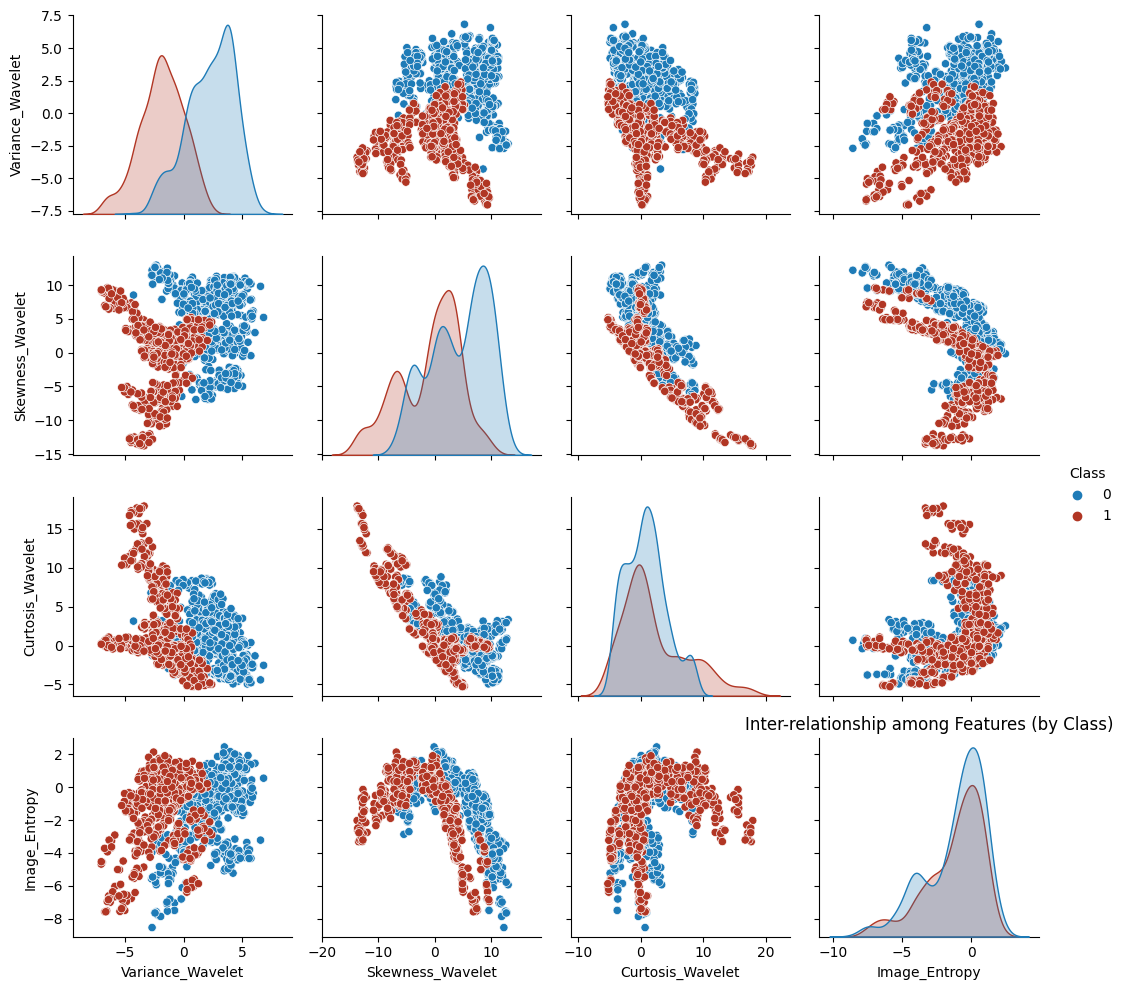

In [6]:
# pairplot

plt.figure(figsize=(9,6), dpi=220)

sns.pairplot(data=df, hue="Class",
             palette={1:"#B13624", 0:"#1E7BB7"})

plt.title("Inter-relationship among Features (by Class)")
plt.tight_layout();

### Observation
1. For several features the target classes seem well distinguished.
    - Classification using these features should not be too difficult

## Preparing the data for training, cross-validation and testing

>**NOTE**: Since we will use a **`Decision Tree`** model to classify banknotes, **feature scaling** will **not be necessary**.
>>_Decision Trees consider a **single feature** while **deciding each split**. Hence even if features scale differently they do not interfere at any decision making process_.

In [7]:
# features
X = df.drop(labels="Class", axis=1)

In [8]:
# target
y = df["Class"]

In [9]:
# for splitting the dataset

from sklearn.model_selection import train_test_split

#### NOTE
Dataset will be **split** into **three sets**
1. **`Training set`**
    - for training the ML model
2. **`Cross-Validation (CV) set`**
    - for deciding which model (_based on various different hyperparameter values_) is the best
3. **`Test set`**
    - for testing performance of final selected model

In [10]:
# split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15,
                                                    random_state=0)

## Building the ML Model

In [11]:
# for selecting best hyperparameters to decide final model
from sklearn.model_selection import GridSearchCV

# for creating a Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

### Creating a Parameter Grid for Searching Optimal Hyperparameters

In [20]:
# hyparameters to consider

# no. of decision trees in RF Classifier
n_estimators = [64, 100, 128, 200, 250]
# maximum no. of features to consider when deciding each split
max_features = [2, 3, 4, "sqrt"]
# bootstrapping
# (random sampling training examples with replacement to form multiple sets of sample training data)
bootstrap = [True, False]
# whether to calculate out of bag error
oob_score = [True, False]

In [21]:
# parameter grid dict

param_grid = {"n_estimators":n_estimators,
             "max_features":max_features,
             "bootstrap":bootstrap,
             "oob_score":oob_score}

#### NOTE: Bootstrapping (`bootstrap`) & Out of Bag score `oob_score`

**Bootstrapping** $\rightarrow$ \
For creating training decision tree with random sampling with replacement.

**Out of Bag score** $\rightarrow$ \
For using left out examples in a particular decision tree (when bootstrapping is done) as testing set for calculating performance of that decision tree on examples which were not used in its training.

**`GridSearchCV`** and possible **`ValueError`** warnings $\rightarrow$ \
When going through all combinations of hyperparameters, it may throw `ValueError` when considering a combination where `oob_score=True` and `bootstrap=False` since out of bag scoring is possible only when bootstrapping in performed.

```python
ValueError: Out of bag estimation only available if bootstrap=True
```

### Creating a Random Forest Classifier Model

In [26]:
# rfc with default hyperparameters
rfclassifier = RandomForestClassifier()

In [27]:
# grid for conducting Grid Search CV to find optimal hyperparameter values
grid = GridSearchCV(estimator=rfclassifier, param_grid=param_grid)

In [28]:
# fit grid to training data
grid.fit(X=X_train, y=y_train)

C:\Users\rayjo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rayjo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rayjo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rayjo\App

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 'sqrt'],
                         'n_estimators': [64, 100, 128, 200, 250],
                         'oob_score': [True, False]})

In [32]:
# best hyperparameter values found by Grid Search CV method
# for the RF CLassifier model
grid.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 64, 'oob_score': False}

#### Observation & Note
_Though best hyperparameters found came out with `bootstrap=False` will still keep it in our model to make it more robust_.

_Since `out of bag score` does not really affect training process, will keep that as true aswell_.

In [33]:
# create model with best hyoerparameter values
rfclassifier = RandomForestClassifier(n_estimators=64,
                                      max_features=2,
                                      bootstrap=True,
                                      oob_score=True)

### Training the Random Forest Classifier

In [35]:
# fit to training set
rfclassifier.fit(X=X_train, y=y_train)

RandomForestClassifier(max_features=2, n_estimators=64, oob_score=True)

In [37]:
# check out of bag score after training with bootstrapping
# NOTE: oob_score_ method returns fraction of examples classified correctly
# oob_score_ = 1.00 = Perfect score
rfclassifier.oob_score_

0.9948542024013722

### Making Predictions on Test set

In [38]:
# predictions
predictions = rfclassifier.predict(X=X_test)

### Probing Predictions and Performance by Model

In [46]:
# for evaluating model

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [40]:
# evaluation report

report = classification_report(y_true=y_test, y_pred=predictions)

print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       117
           1       0.99      1.00      0.99        89

    accuracy                           1.00       206
   macro avg       0.99      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206



In [44]:
# confusion matrix

cm = confusion_matrix(y_true=y_test, y_pred=predictions,
                     labels=rfclassifier.classes_)

Text(0.5, 0.98, 'Confusion Matrix')

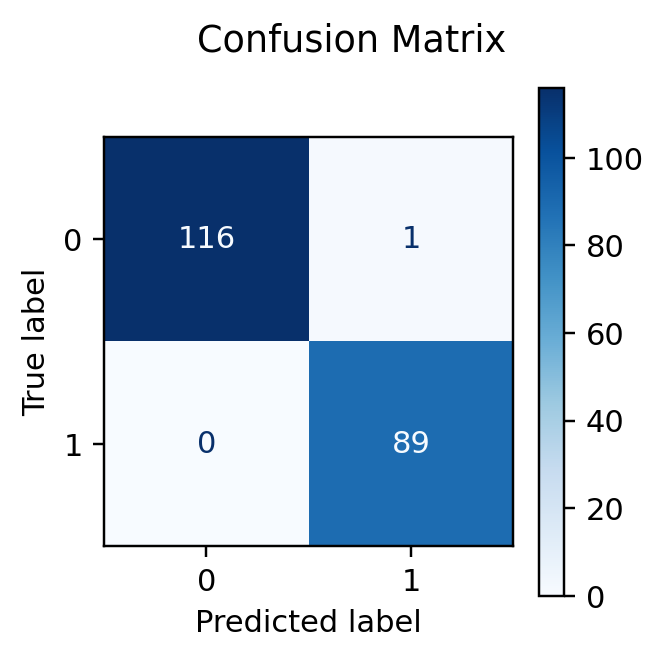

In [45]:
# plot confusion matrix

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,
                      display_labels=rfclassifier.classes_)

fig, ax = plt.subplots(figsize=(3,3), dpi=220)
cm_display.plot(im_kw={"cmap":"Blues"}, ax=ax)

fig.suptitle("Confusion Matrix")

#### Observation
1. Random Forest Classifier model performed very well on test set.
    - Only **one genuine banknote** was **misclassified** as being forged.
---
>_Model may **generalize well** in real-world but shows that **human interventions** cannot be done away with completely. When dealing with cases of fake currency notes, misclassifying even one note may turn out problemattic._

### Was a Random Forest of 64 Decision Trees necessary?
Since **no. of features are not that many** in this project, may be interesting to check the **error v/s performance** metric to see at what **`n_estimators`** (_no. of decision trees_) performance starts to get **saturated**.

>**`accuracy_score`** of **`sklearn.metrics`** will be used for computing fraction of examples which were classified correctly, i.e. **`Predicted value (y) = Actual ground truth label`**
>>Error metric $\rightarrow$ **`error = 1 - accuracy_score`**

In [48]:
# for storing error score and number of misclassified examples
errors = []
misclassifications = []

for i in range(1, 64):
    # create RF Classifier for current no. of estimators
    rfc = RandomForestClassifier(n_estimators=i,
                                max_features=2)
    # fit current RF Classifier to training set
    rfc.fit(X=X_train, y=y_train)
    # make predictions on test set
    preds = rfc.predict(X=X_test)
    # accuracy score & error
    accuracy = accuracy_score(y_true=y_test, y_pred=preds, normalize=True)
    # error score
    error = 1 - accuracy
    errors.append(error)
    # no. of misclassified examples
    missed = np.sum(preds != y_test)
    misclassifications.append(missed)

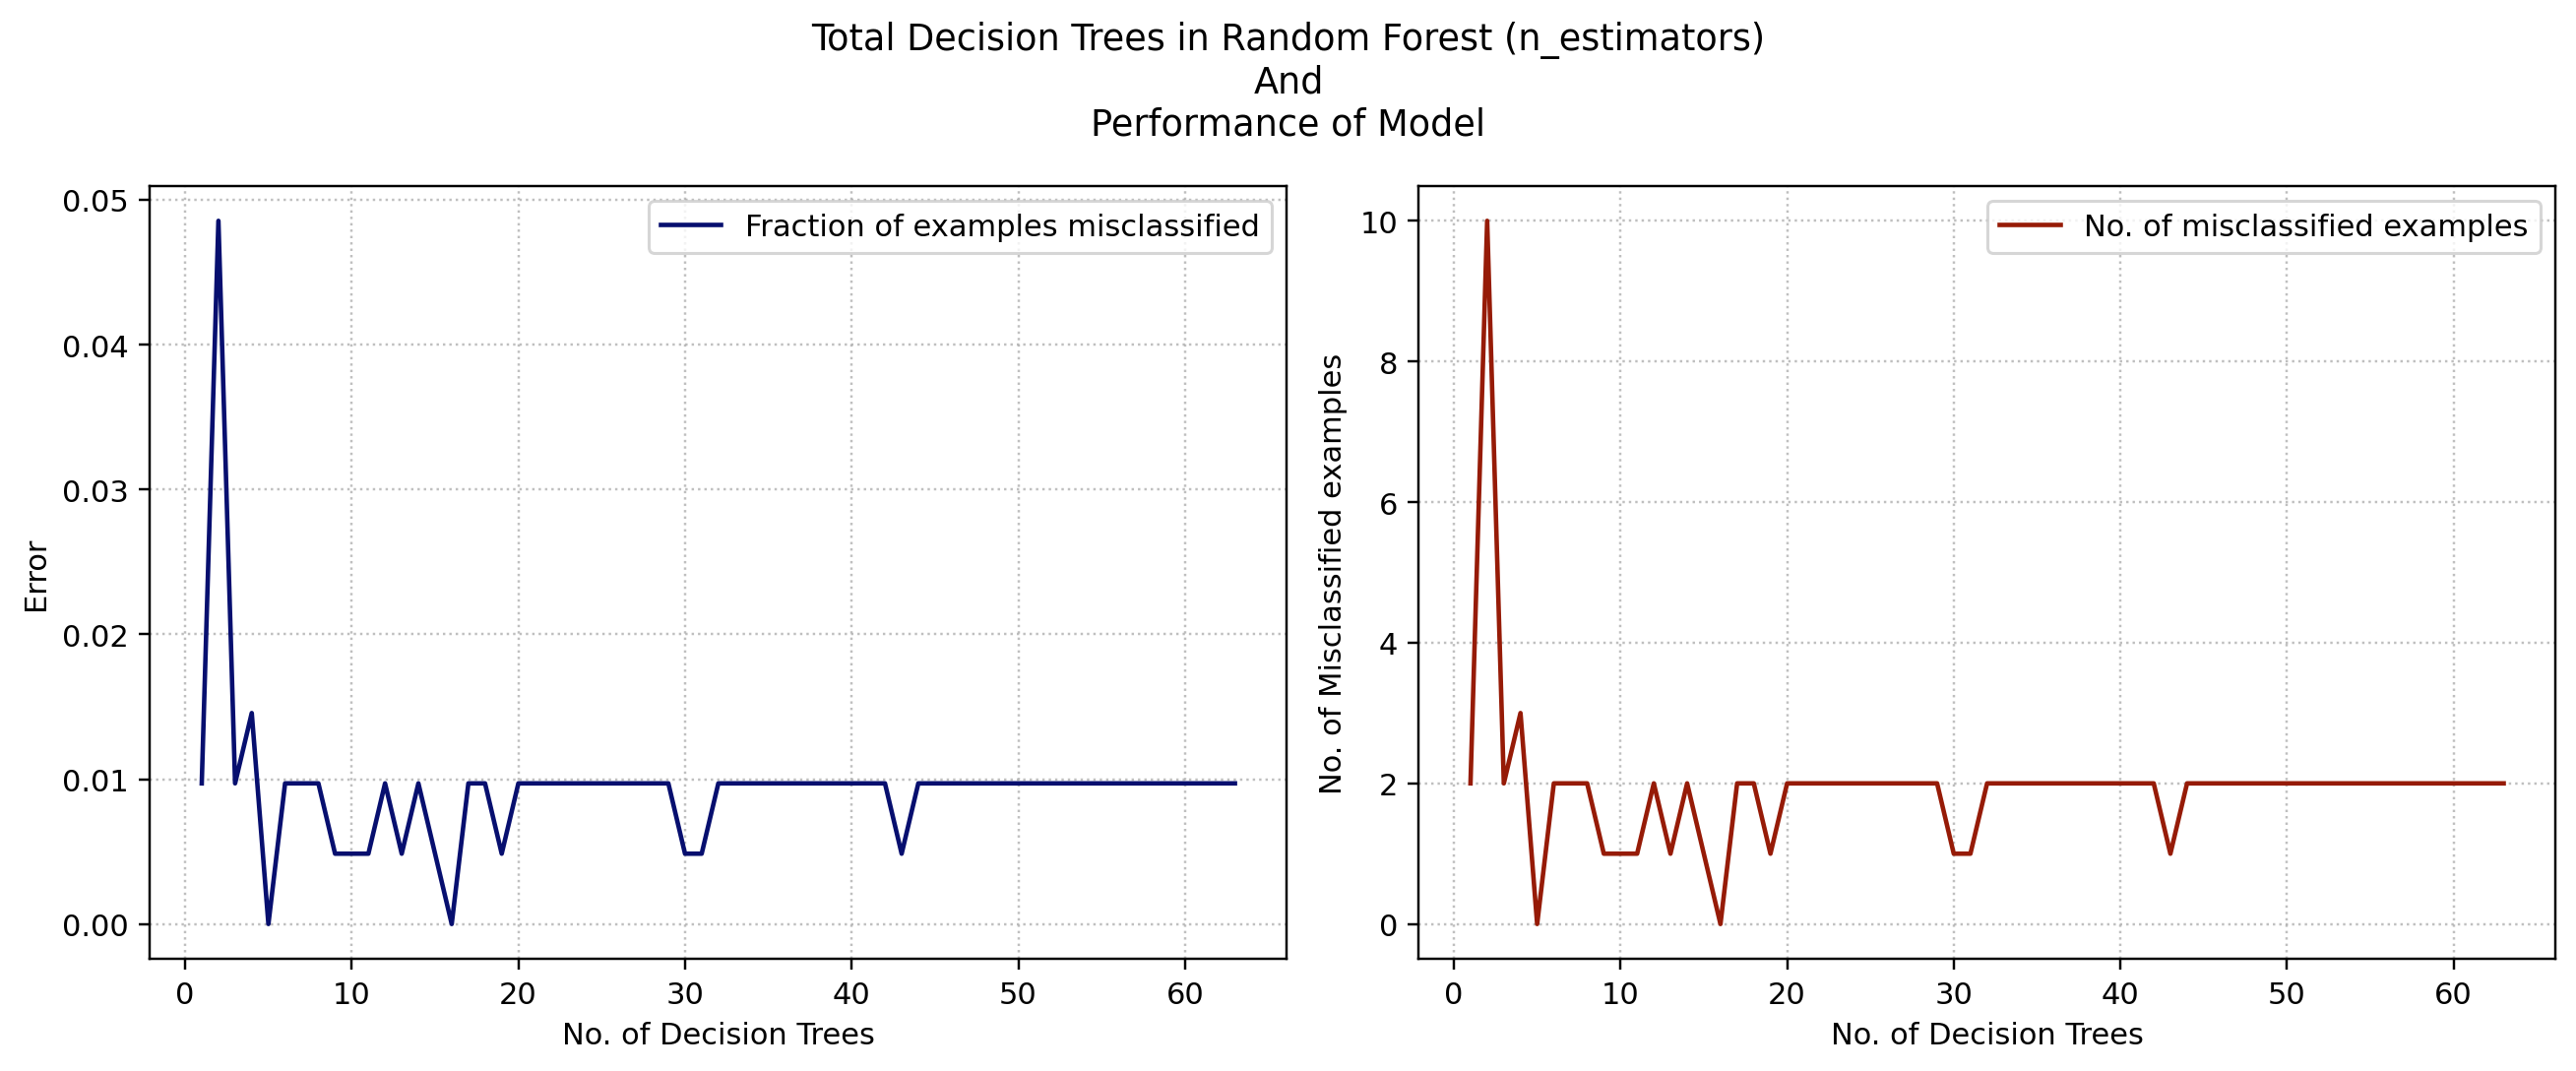

In [56]:
# plot errors and n_estimators

fig, ax = plt.subplots(nrows=1, ncols=2,
                      figsize=(12,5), dpi=220)
ax1, ax2 = ax
xVals = range(1, 64)

# errors v/s n_estimators
ax1.plot(xVals, errors, color="#070F6F",
        label="Fraction of examples misclassified")
# misclassifications v/s n_estimators
ax2.plot(xVals, misclassifications, color="#961B07",
        label="No. of misclassified examples")

ax1.grid(linestyle=":", alpha=0.8)
ax2.grid(linestyle=":", alpha=0.8)
ax1.legend(loc="best")
ax2.legend(loc="best")

ax1.set_xlabel("No. of Decision Trees")
ax1.set_ylabel("Error")
ax2.set_xlabel("No. of Decision Trees")
ax2.set_ylabel("No. of Misclassified examples")

fig.suptitle("Total Decision Trees in Random Forest (n_estimators)\nAnd\nPerformance of Model")

fig.tight_layout();

### Observation
1. Even with **`n_estimators = 20 to 30`** maximum one-or-two examples misclassified.
    - can work with a **simpler model** without compromising much performance